In [63]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
from skimage import io
import os
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset, random_split
from torchvision import transforms, datasets, models
from torch.autograd import Variable
from matplotlib.pyplot import imread
from torch.optim import lr_scheduler
import numpy as np
import pandas as pd
import os
import imageio
import glob
import pathlib
from PIL import Image
import warnings
warnings.filterwarnings("ignore")
torch.backends.cudnn.deterministic = True

data = 'drive/My Drive/rock_paper_scissors/data'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)


cuda:0


In [24]:
for infile in glob.glob(os.path.join(data, '**/*.png')):
    print(infile)

drive/My Drive/rock_paper_scissors/data/paper/paper_0.png
drive/My Drive/rock_paper_scissors/data/paper/paper_1.png
drive/My Drive/rock_paper_scissors/data/paper/paper_2.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_0.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_2.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_4.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_3.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_5.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_7.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_1.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_6.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_13.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_8.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_14.png
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_9.png
drive/My Drive/rock_paper_scissors/data/pape

In [40]:
v = []
for i, files in enumerate(pathlib.Path(data).glob('**/*.png')):
    print(files)
    value = np.hstack((files.parent.name, files))
    print(value)
    v.append(value)

df = pd.DataFrame(v)
df = df.sample(frac = 1)
df.to_csv('train.csv',header=['label', 'path'], index=False)

drive/My Drive/rock_paper_scissors/data/paper/paper_0.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scissors/data/paper/paper_0.png')]
drive/My Drive/rock_paper_scissors/data/paper/paper_1.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scissors/data/paper/paper_1.png')]
drive/My Drive/rock_paper_scissors/data/paper/paper_2.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scissors/data/paper/paper_2.png')]
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_0.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_0.png')]
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_2.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_2.png')]
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_4.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_4.png')]
drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_3.png
['paper'
 PosixPath('drive/My Drive/rock_paper_scisso

In [44]:
data_csv = pd.read_csv('train.csv')
data_csv.head()

,label,path
0,scissors,drive/My Drive/rock_paper_scissors/data/scisso...
1,paper,drive/My Drive/rock_paper_scissors/data/paper/...
2,scissors,drive/My Drive/rock_paper_scissors/data/scisso...
3,scissors,drive/My Drive/rock_paper_scissors/data/scisso...
4,rock,drive/My Drive/rock_paper_scissors/data/rock/o...


In [46]:
labels_names = data_csv["label"].unique()
labels_sorted = labels_names.sort()

labels_dict = dict(zip(range(len(labels_names)), labels_names))
len(labels_dict)

3

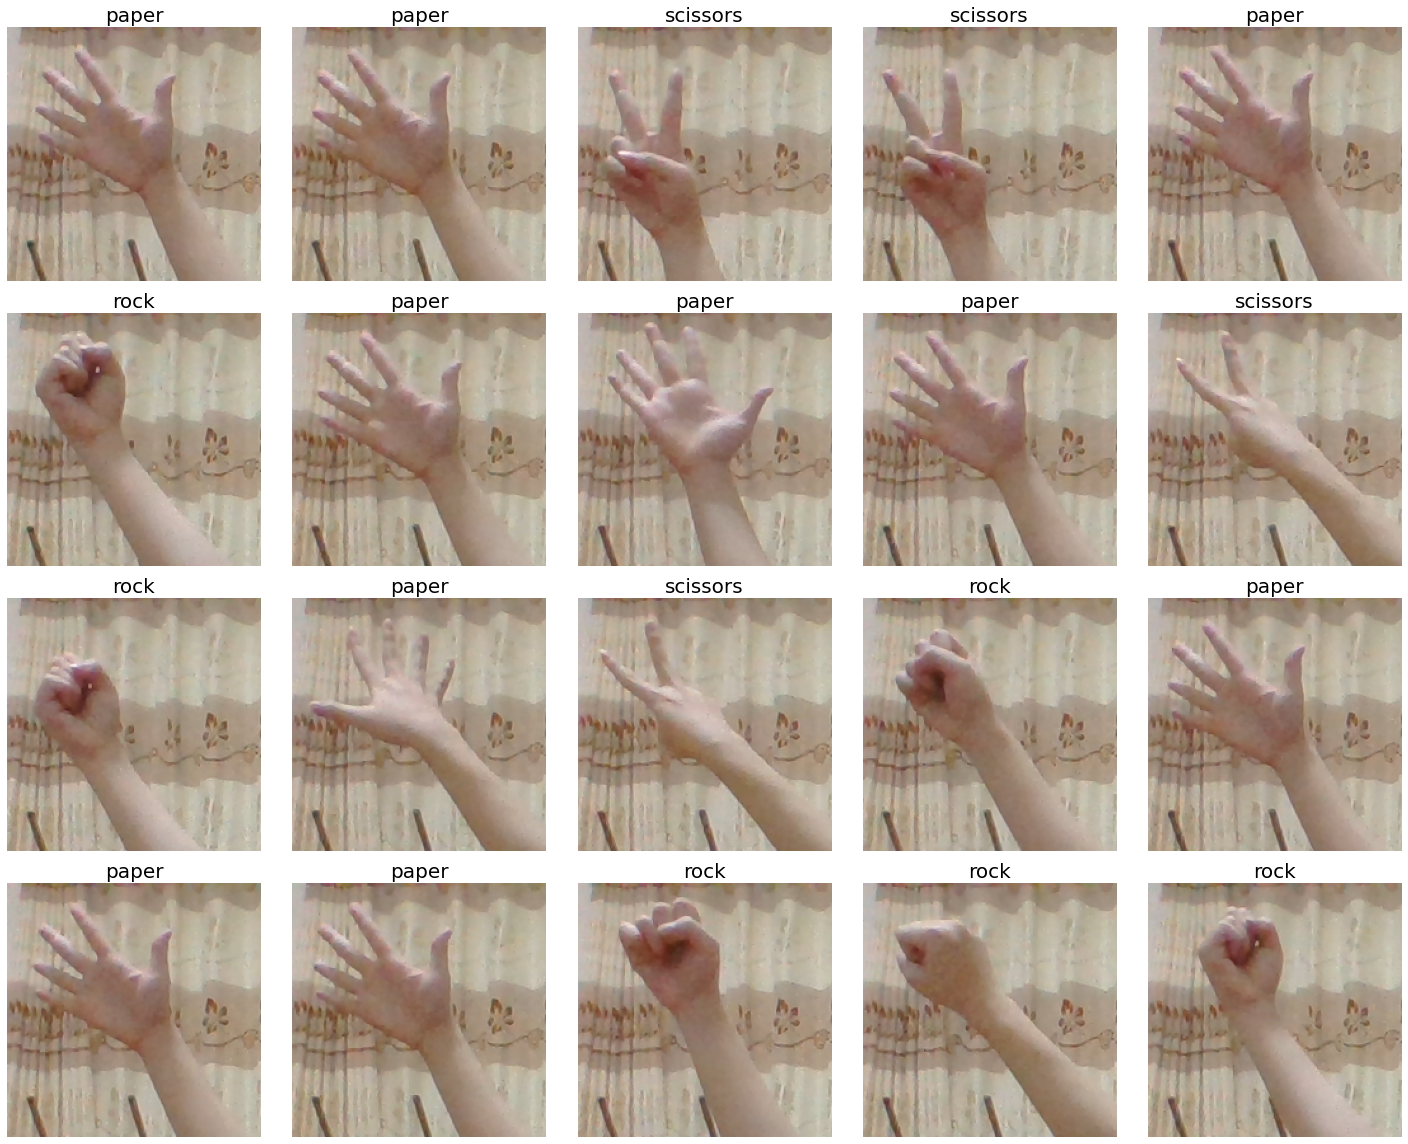

In [49]:
def display_images(data, labels):
    classes = len(labels_dict) # 3
    num_imgs = 20
    columns = 5 # columns * rows = num_imgs
    rows = 4

    rand = np.random.randint(0, classes, num_imgs)
    fig = plt.figure(figsize = (20,16))

    for i, lab in enumerate(rand):
        label =  labels_dict[lab]
        path = os.path.join(data, label)

        imgs_list = os.listdir(path)

        rand_imgs = np.random.randint(0, len(imgs_list))

        imgs = imgs_list[rand_imgs]

        fig.add_subplot(rows, columns, i + 1)
        images = Image.open(os.path.join(path, imgs))

        plt.axis('off')
        plt.title(label,fontsize = 20)
        plt.imshow(images)
        
    plt.tight_layout()
    plt.show()

display_images(data, data_csv)

In [12]:
BATCH_SIZE = 32
IMG_SIZE = 128

data_transform = transforms.Compose([
                                     transforms.Resize(IMG_SIZE),
                                     transforms.CenterCrop(IMG_SIZE),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5),
                                                          (0.5, 0.5, 0.5))
])

train_set = datasets.ImageFolder(root = data, transform= data_transform)
train_data, val_data = random_split(train_set, [750, 160])
train_loader = DataLoader(train_data, batch_size = BATCH_SIZE, shuffle = True, num_workers = 4, pin_memory= True)
val_loader = DataLoader(val_data, batch_size = BATCH_SIZE, shuffle = False, num_workers = 4, pin_memory= True)


[('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_0.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_1.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_10.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_100.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_101.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_102.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_103.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_104.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_105.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_106.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_107.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_108.png', 0), ('drive/My Drive/rock_paper_scissors/data/paper/opencv_frame_109.png', 0), ('drive/My Drive/rock_paper_s

In [14]:
train_set.class_to_idx

{'paper': 0, 'rock': 1, 'scissors': 2}

In [13]:
dataloader = {'train': train_loader , 'val': val_loader}

print(len(dataloader['train'].dataset))
print(len(dataloader['val'].dataset))

750
160


In [56]:
# Use resnet50 as pretrained model
resnet = models.resnet50(pretrained = True)
resnet = resnet.to(device)

for params in resnet.parameters():
    params.requires_grad = False

in_features = resnet.fc.in_features
resnet.fc = nn.Linear(in_features = in_features, out_features = 3).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.fc.parameters(),lr = 1e-4)
scheduler = lr_scheduler.StepLR(optimizer, step_size = 7, gamma = 0.1)

In [61]:
EPOCHS = 30
def train_model(model, dataloader, optimizer,scheduler, criterion, num_epochs = EPOCHS):
    best_acc = 0
    dataloader_size = {'train': len(dataloader['train'].dataset),
                       'val': len(dataloader['val'].dataset)}
    train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []

    for epoch in range(num_epochs):

        for mode in ['train','val']:
            if mode == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()

            running_loss = 0
            running_acc = 0
            for img, label in dataloader[mode]:
                optimizer.zero_grad()

                img = Variable(img).view(-1, 3, IMG_SIZE, IMG_SIZE).to(device)
                label = Variable(label).to(device)

                outputs = model(img)  
                preds = torch.max(outputs.data, 1)[1]
                loss = criterion(outputs, label)

                if mode == 'train':
                    loss.backward()
                    optimizer.step()

                running_loss += loss.item()
                running_acc += torch.sum(preds == label.data)
            
            if mode == 'train':
                train_epoch_loss = running_loss /dataloader_size[mode]
                train_loss_list.append(train_epoch_loss)

                train_epoch_acc = float(running_acc) / dataloader_size[mode]
                train_acc_list.append(train_epoch_acc)
            
            else:
                val_epoch_loss = running_loss /dataloader_size[mode]
                val_loss_list.append(val_epoch_loss)

                val_epoch_acc = float(running_acc) / dataloader_size[mode]
                val_acc_list.append(val_epoch_acc)

            if mode == 'val' and val_epoch_acc > best_acc:
                best_acc = val_epoch_acc
                torch.save(model.state_dict(),'drive/My Drive/rock_paper_scissors/model/model1.pt')

        print(f'Epoch: [{epoch + 1: 02}/{num_epochs}]')
        print(f'\t\t Train Loss: {train_epoch_loss :.4f} | Train Acc: {train_epoch_acc: .4f}')
        print(f'\t\t Val Loss: {val_epoch_loss :.4f} | Val Acc: {val_epoch_acc: .4f}')

    model.load_state_dict(torch.load('drive/My Drive/rock_paper_scissors/model/model1.pt'))        
    return model, train_loss_list, val_loss_list, train_acc_list, val_acc_list

In [64]:
%%time
model, train_loss_list, val_loss_list, train_acc_list, val_acc_list= train_model(resnet,dataloader, optimizer, scheduler, criterion, num_epochs=EPOCHS)

Epoch: [ 1/30]
		 Train Loss: 0.0193 | Train Acc:  0.9573
		 Val Loss: 0.0165 | Val Acc:  0.9812
Epoch: [ 2/30]
		 Train Loss: 0.0156 | Train Acc:  0.9773
		 Val Loss: 0.0135 | Val Acc:  0.9875
Epoch: [ 3/30]
		 Train Loss: 0.0126 | Train Acc:  0.9827
		 Val Loss: 0.0110 | Val Acc:  0.9875
Epoch: [ 4/30]
		 Train Loss: 0.0115 | Train Acc:  0.9907
		 Val Loss: 0.0111 | Val Acc:  0.9875
Epoch: [ 5/30]
		 Train Loss: 0.0113 | Train Acc:  0.9880
		 Val Loss: 0.0107 | Val Acc:  0.9875
Epoch: [ 6/30]
		 Train Loss: 0.0110 | Train Acc:  0.9893
		 Val Loss: 0.0105 | Val Acc:  0.9875
Epoch: [ 7/30]
		 Train Loss: 0.0109 | Train Acc:  0.9880
		 Val Loss: 0.0104 | Val Acc:  0.9875
Epoch: [ 8/30]
		 Train Loss: 0.0109 | Train Acc:  0.9880
		 Val Loss: 0.0103 | Val Acc:  0.9875
Epoch: [ 9/30]
		 Train Loss: 0.0107 | Train Acc:  0.9853
		 Val Loss: 0.0101 | Val Acc:  0.9875
Epoch: [ 10/30]
		 Train Loss: 0.0107 | Train Acc:  0.9867
		 Val Loss: 0.0098 | Val Acc:  0.9875
Epoch: [ 11/30]
		 Train Loss

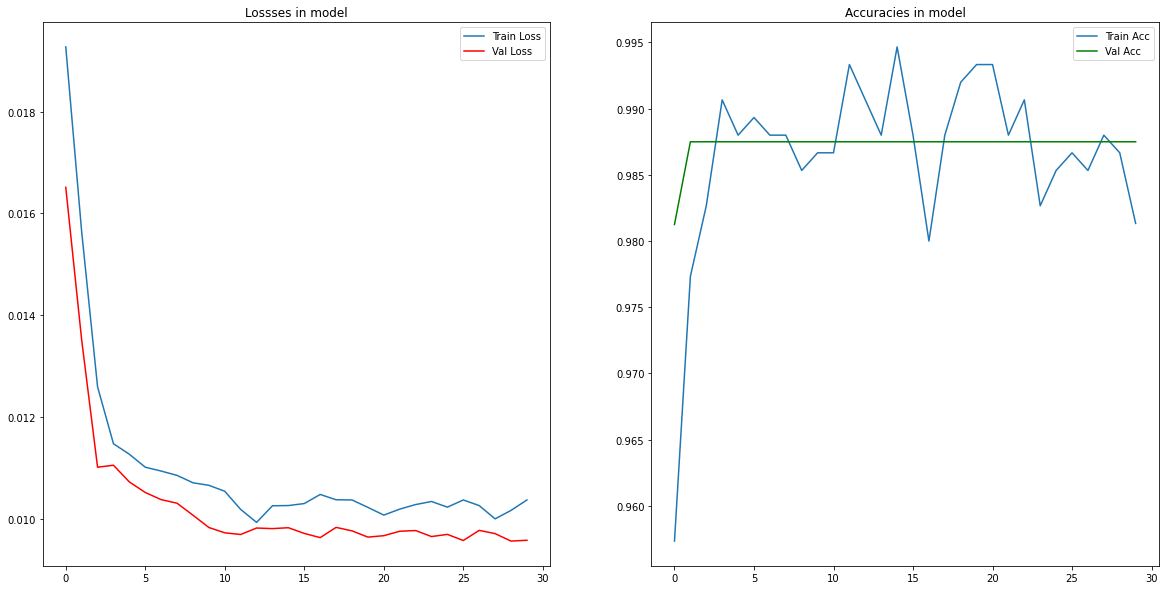

In [68]:
def plot_weight(train_loss_list,val_loss_list,train_acc_list,val_acc_list, epoch):
    fig = plt.figure(figsize = (20,10))
    # fig 1 - Loss
    fig.add_subplot(1,2,1)
    plt.plot(range(epoch),train_loss_list,label = 'Train Loss')
    plt.plot(range(epoch),val_loss_list,  label = 'Val Loss', color = 'red')
    plt.legend()
    plt.title('Lossses in model')

    #fig 2 - Acc
    fig.add_subplot(1,2,2)
    plt.plot(range(epoch),train_acc_list,label = 'Train Acc')
    plt.plot(range(epoch),val_acc_list,label = 'Val Acc', color = 'green')
    plt.legend()
    plt.title('Accuracies in model')

plot_weight(train_loss_list, val_loss_list, train_acc_list, val_acc_list, EPOCHS)